In [454]:
# 데이터 불러오기
# 데이터 확인 - nan, 0, 타입, 피쳐데이터, 간격
# - 문자타입 : 삭제, 아스키코드, 원핫인코딩
# - 팀명 : 원핫인코딩
# - 이름 : 삭제
# - 2018년 연봉 분리
# 서로 데이터 간 상관관계

# 데이터 전처리 - data,result 분리
# - train, test 세트 분리

# PolynomialFeatures, StandardScaler,Ridge 를 사용해서 성능을 올려주셈


# 데이터 예측 : LinearRegression 모델사용

# 데이터 예측률 구하기

# 2018년 연봉 예측 프로그램 구현
# 예측률을 구하기


In [455]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [456]:
picher = pd.read_csv('picher_stats_2017.csv')
picher

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,2,5,0,0,2,33,5,62.2,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,노경은,롯데,0,2,0,0,0,9,2,14.2,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,김승현,삼성,0,3,0,1,0,41,0,43.2,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


In [457]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

In [458]:
# 팀명 원핫인코딩
# name_encoding = pd.get_dummies(picher['선수명'])
team_encoding = pd.get_dummies(picher['팀명'])
# picher = picher.drop('선수명', axis=1)
picher = picher.drop('팀명', axis=1)
# picher = picher.join(name_encoding)
picher = picher.join(team_encoding)
picher

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,16,7,0,0,0,30,30,190.0,8.95,...,85000,False,False,False,False,True,False,False,False,False
1,소사,11,11,1,0,0,30,29,185.1,7.43,...,50000,False,False,True,False,False,False,False,False,False
2,양현종,20,6,0,0,0,31,31,193.1,7.36,...,150000,True,False,False,False,False,False,False,False,False
3,차우찬,10,7,0,0,0,28,28,175.2,8.04,...,100000,False,False,True,False,False,False,False,False,False
4,레일리,13,7,0,0,0,30,30,187.1,7.49,...,85000,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,2,5,0,0,2,33,5,62.2,4.31,...,8100,False,False,False,False,False,False,False,False,True
148,정용운,3,2,0,0,0,25,11,59.1,4.85,...,3100,True,False,False,False,False,False,False,False,False
149,노경은,0,2,0,0,0,9,2,14.2,4.91,...,16000,False,False,False,False,False,False,True,False,False
150,김승현,0,3,0,1,0,41,0,43.2,7.63,...,2900,False,False,False,False,False,False,False,True,False


In [459]:
# 데이터 분리
datas = picher[picher.columns.difference(['선수명', '연봉(2018)'])] # 연봉과 선수명을 뺀 전부
results = picher['연봉(2018)'] # 연봉
train_input, test_input, train_target, test_target, = train_test_split(datas, results, random_state=42)

In [460]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [461]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.9344519586230714
0.7330121587682972


In [462]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [463]:
lr = LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression()

In [464]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9344519586230713
0.7330121587682987


In [465]:
# 규제 - 릿지규제, 라쏘 규제
# 규제를 적용하려면, 표준화 작업이 필요
# 변환기
from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()
# ss.fit(train_poly)
# train_scaled = ss.transform(train_poly)
# test_scaled = ss.transform(test_poly)
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [466]:
# 릿지 규제
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)

# # 라쏘 규제
# from sklearn.linear_model import Lasso
# lasso = Lasso()
# lasso.fit(train_scaled, train_target)

Ridge()

In [467]:
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

# 라쏘
# print(lasso.score(train_scaled,train_target))
# print(lasso.score(test_scaled,test_target))

0.9335869585150005
0.7638252500807863


In [468]:
train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100]

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled,train_target)
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))

# for alpha in alpha_list:
#     ridge = Lasso(alpha=alpha)
#     ridge.fit(train_scaled,train_target)
#     train_score.append(ridge.score(train_scaled,train_target))
#     test_score.append(ridge.score(test_scaled,test_target))

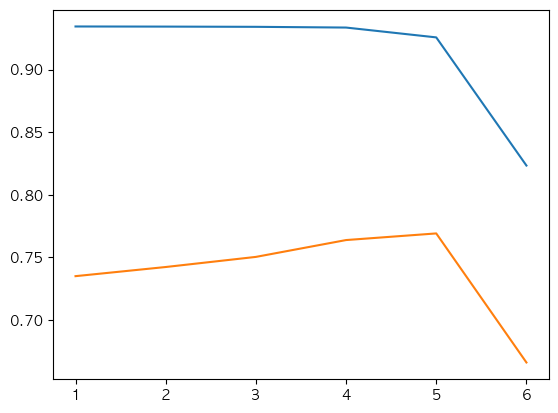

In [469]:
x = np.arange(1,7).reshape(-1,1)
plt.plot(x,train_score)
plt.plot(x,test_score)
plt.show()

In [470]:
ridge = Ridge(alpha=10)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

# lasso = Lasso(alpha=10)
# lasso.fit(train_scaled,train_target)
# print(lasso.score(train_scaled,train_target))
# print(lasso.score(test_scaled,test_target))

0.925729609544321
0.7691263916403447
